C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


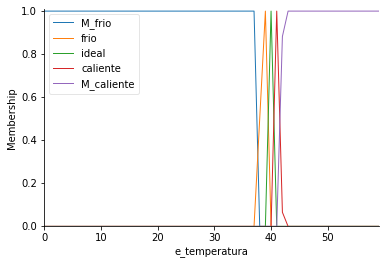

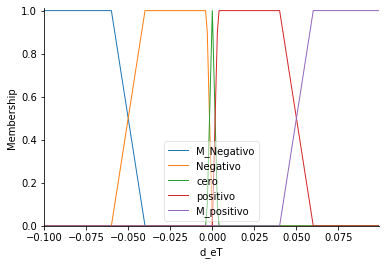

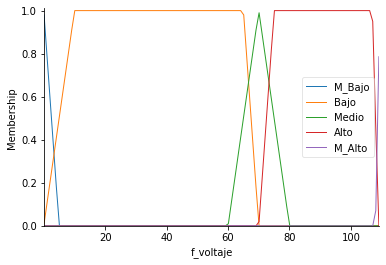

In [16]:
#Parcial diseaño mecatronico
#Luis Miguel Romero Gutierrez
# Allan Batista 
# Jader Cardona 

#Para intalar la funciones en anaconda, ponga los comandos en prompt
#conda install -c conda-forge scikit-fuzzy
# Primer Metodo 

# Se importan las librerias y se llaman a la funciones que se van a utilizar
import numpy as np  
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#Se declaran los rangos de la entradas y la salida 
e_temperatura = ctrl.Antecedent(np.arange(0, 60, 1),'e_temperatura')
d_eT = ctrl.Antecedent(np.arange(-0.1,0.1, 0.001), 'd_eT')
f_voltaje=ctrl.Consequent(np.arange(0.1,110, 1), 'f_voltaje')

e_temperatura['M_frio'] = fuzz.trapmf(e_temperatura.universe, [0, 0, 37, 38])
e_temperatura['frio'] = fuzz.trimf(e_temperatura.universe, [37, 39, 40])
e_temperatura['ideal'] = fuzz.trimf(e_temperatura.universe, [39, 40, 41])
e_temperatura['caliente']= fuzz.trimf(e_temperatura.universe, [40, 41, 42.07])
e_temperatura['M_caliente']= fuzz.trapmf(e_temperatura.universe, [41.1,42.12, 59.1,59.1])

#Para Derivada del error
d_eT['M_Negativo'] = fuzz.trapmf(d_eT.universe, [-0.1,-0.1,-0.06,-0.04])
d_eT['Negativo'] = fuzz.trapmf(d_eT.universe, [-0.06,-0.04,-0.003333,0])
d_eT['cero']= fuzz.trimf(d_eT.universe, [-0.003333,0,0.003333])
d_eT['positivo'] = fuzz.trapmf(d_eT.universe, [0, 0.003333, 0.04,0.06])
d_eT['M_positivo'] = fuzz.trapmf(d_eT.universe, [0.04,0.06,0.1,0.1])

#Para la salida(voltaje)
f_voltaje['M_Bajo'] = fuzz.trimf(f_voltaje.universe, [0,0,5])
f_voltaje['Bajo'] = fuzz.trapmf(f_voltaje.universe, [0,10,65,70])
f_voltaje['Medio'] =fuzz.trimf(f_voltaje.universe,[60,70,80])
f_voltaje['Alto'] = fuzz.trapmf(f_voltaje.universe, [70, 75, 107,109])
f_voltaje['M_Alto'] = fuzz.trapmf(f_voltaje.universe, [108,109.4,110,110])
e_temperatura.view()
d_eT.view()
f_voltaje.view()



Digite la t_entrada [30-56]38
89.88216439310692
El error es:  0.02


C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


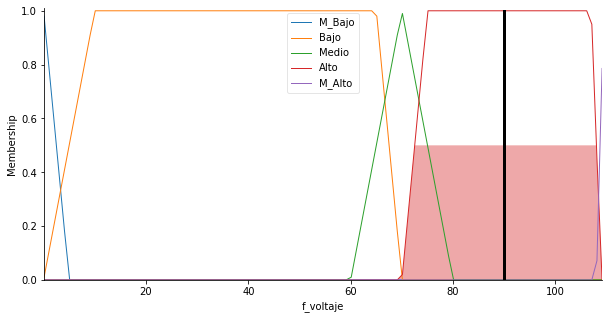

In [24]:
# Las reglas 
rule1 = ctrl.Rule(e_temperatura['M_frio'] & d_eT['M_positivo'], f_voltaje['M_Alto'])
rule2 = ctrl.Rule(e_temperatura['M_frio'] & d_eT['positivo'], f_voltaje['M_Alto'])
rule3 = ctrl.Rule(e_temperatura['frio'] & d_eT['M_positivo'], f_voltaje['M_Alto'])
rule4 = ctrl.Rule(e_temperatura['frio'] & d_eT['positivo'], f_voltaje['Alto'])
rule5 = ctrl.Rule(e_temperatura['frio'] & d_eT['cero'], f_voltaje['Medio'])
rule6 = ctrl.Rule(e_temperatura['ideal'] & d_eT['positivo'], f_voltaje['Medio'])
rule7 = ctrl.Rule(e_temperatura['ideal'] & d_eT['cero'], f_voltaje['Medio'])
rule8 = ctrl.Rule(e_temperatura['ideal'] & d_eT['Negativo'], f_voltaje['Medio'])
rule9 = ctrl.Rule(e_temperatura['caliente'] & d_eT['cero'], f_voltaje['Medio'])
rule10 = ctrl.Rule(e_temperatura['caliente'] & d_eT['Negativo'], f_voltaje['Medio'])
rule11 = ctrl.Rule(e_temperatura['caliente'] & d_eT['M_Negativo'], f_voltaje['Bajo'])
rule12 = ctrl.Rule(e_temperatura['M_caliente'] & d_eT['M_Negativo'], f_voltaje['M_Bajo'])
rule13 = ctrl.Rule(e_temperatura['M_caliente'] & d_eT['Negativo'], f_voltaje['M_Bajo'])


Voltaje__ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,rule10,rule11,rule12,rule13])
Voltaje= ctrl.ControlSystemSimulation(Voltaje__ctrl)

setpoint=40
temperatura_A= float(input("Digite la t_entrada [30-56]"))
 # se identa a funcion
Voltaje.input['e_temperatura']=temperatura_A
d_eT0 =(setpoint-temperatura_A)/100 # se calcula la derivada
Voltaje.input['d_eT'] =d_eT0 # se identa a funcion
Voltaje.compute()
print(Voltaje.output['f_voltaje'])
print('El error es: ' ,d_eT0 )
f_voltaje.view(sim=Voltaje)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

(<matplotlib.axes._subplots.AxesSubplot at 0x266c203fd88>,
 Text(0.5, 1.0, 'MA_Voltaje'))

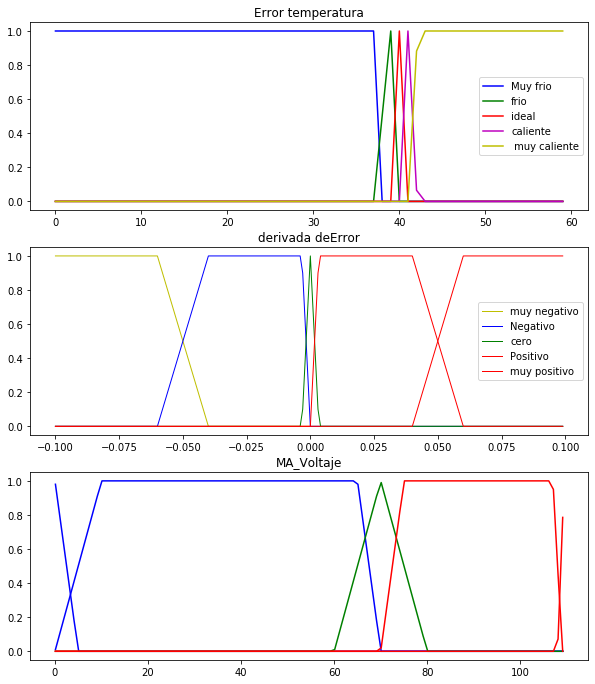

In [20]:
# Metodo # 2 
import numpy as np
import skfuzzy as fuzz # se utiliza la libreria de scikit -para control fuzzy  
import matplotlib.pyplot as plt

x_e_temperatura = np.arange(0, 60, 1)
x_d_eT= np.arange(-0.1,0.1, 0.001)
x_Voltaje = np.arange(0.1,110, 1)

# Generate fuzzy membership functions
Temperatura_mf = fuzz.trapmf(x_e_temperatura,[0, 0, 37, 38])
Temperatura_f = fuzz.trimf(x_e_temperatura ,[37, 39, 40])
Temperatura_ideal = fuzz.trimf(x_e_temperatura , [39, 40, 41])
Temperatura_c = fuzz.trimf(x_e_temperatura , [40, 41, 42.07])
Temperatura_mc = fuzz.trapmf(x_e_temperatura , [41.1,42.12, 59.1,59.1])
#Para Derivada del error
eT_Mn= fuzz.trapmf(x_d_eT, [-0.1,-0.1,-0.06,-0.04])
eT_n = fuzz.trapmf(x_d_eT, [-0.06,-0.04,-0.003333,0])
eT_cero = fuzz.trimf(x_d_eT, [-0.003333,0,0.003333])
eT_p = fuzz.trapmf(x_d_eT, [0, 0.003333, 0.04,0.06])
eT_Mp=fuzz.trapmf(x_d_eT,[0.04,0.06,0.1,0.1])

#Para la voltaje
voltaje_M_Bajo= fuzz.trimf(x_Voltaje, [0,0,5])
voltaje_Bajo= fuzz.trapmf(x_Voltaje, [0,10,65,70])
voltaje_Medio = fuzz.trimf(x_Voltaje, [60,70,80])
voltaje_Alto = fuzz.trapmf(x_Voltaje,[70, 75, 107,109])
voltaje_M_Alto = fuzz.trapmf(x_Voltaje, [108,109.4,110,110])
                           
plt.rcParams["figure.figsize"] = 10, 20

plt.subplot(5,1,2), plt.plot(x_e_temperatura , Temperatura_mf, 'b', linewidth=1.5, label='Muy frio')
plt.subplot(5,1,2), plt.plot(x_e_temperatura , Temperatura_f, 'g', linewidth=1.5, label='frio')
plt.subplot(5,1,2), plt.plot(x_e_temperatura , Temperatura_ideal, 'r', linewidth=1.5, label='ideal')
plt.subplot(5,1,2), plt.plot(x_e_temperatura , Temperatura_c, 'm', linewidth=1.5, label='caliente')
plt.subplot(5,1,2), plt.plot(x_e_temperatura , Temperatura_mc, 'y', linewidth=1.5, label=' muy caliente'), plt.title('Error temperatura')
plt.legend()

plt.subplot(5,1,3), plt.plot(x_d_eT, eT_Mn, 'y', linewidth=1, label='muy negativo')
plt.subplot(5,1,3), plt.plot(x_d_eT, eT_n, 'b', linewidth=1, label='Negativo')
plt.subplot(5,1,3), plt.plot(x_d_eT, eT_cero, 'g', linewidth=1, label='cero')
plt.subplot(5,1,3), plt.plot(x_d_eT, eT_p, 'r', linewidth=1, label='Positivo')
plt.subplot(5,1,3), plt.plot(x_d_eT, eT_Mp, 'r', linewidth=1, label='muy positivo'), plt.title('derivada deError')
plt.legend()

plt.subplot(5,1,4), plt.plot(x_Voltaje, voltaje_M_Bajo, 'b', linewidth=1.5, label='V_bajo')
plt.subplot(5,1,4), plt.plot(x_Voltaje, voltaje_Bajo, 'b', linewidth=1.5, label='bajo')
plt.subplot(5,1,4), plt.plot(x_Voltaje, voltaje_Medio, 'g', linewidth=1.5, label='V_medio')
plt.subplot(5,1,4), plt.plot(x_Voltaje,voltaje_Alto, 'r', linewidth=1.5, label='Alto'),plt.title('A_Voltaje')
plt.subplot(5,1,4), plt.plot(x_Voltaje,voltaje_M_Alto, 'r', linewidth=1.5, label='Alto'),plt.title('MA_Voltaje')
                           

Digite la t_entrada [30-60]38


No handles with labels found to put in legend.


La derivada de error es:  0.02
La derivada de error es:  0.02


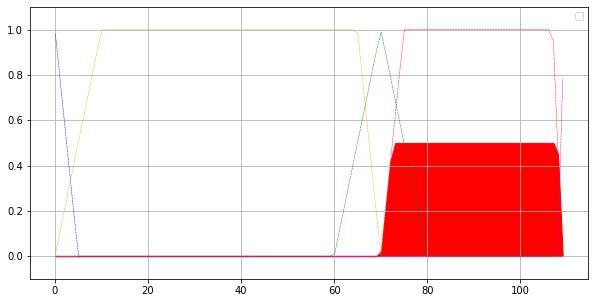

El valor de centroide es:  89.8829124126813


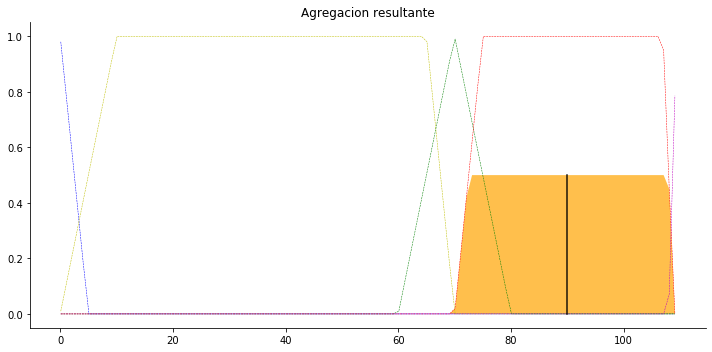

In [25]:
def and_rule(x, y, z):
    rule = np.fmin(x, y)
    act = np.fmin(rule, z)
    return act

def or_rule(x, y, z):
    rule = np.fmax(x, y)
    act = np.fmax(rule, z)
    return act

def apply_T_rules(Valor_temperatura):
     
    
    Temperatura_level_mf = fuzz.interp_membership(x_e_temperatura, Temperatura_mf, Valor_temperatura)
    Temperatura_level_f= fuzz.interp_membership(x_e_temperatura, Temperatura_f, Valor_temperatura)
    Temperatura_level_ideal= fuzz.interp_membership(x_e_temperatura, Temperatura_ideal, Valor_temperatura)
    Temperatura_level_c = fuzz.interp_membership(x_e_temperatura, Temperatura_c, Valor_temperatura)
    Temperatura_level_mc = fuzz.interp_membership(x_e_temperatura, Temperatura_mc, Valor_temperatura)
    
    
    setpoint=40 # se guarda la temperatura anterior
    d_eT0 =(setpoint-Valor_temperatura)/100  # se calcula la derivada,se divide entre 100 para dejarlo a la escala
    print ("La derivada de error es: ", d_eT0)
    if d_eT0>=0.1: # como para el 
        d_eT0=0.099
        
    if d_eT0<=-0.1:
        d_eT0=-0.099
    
    
    d_eT_level_mn = fuzz.interp_membership(x_d_eT, eT_Mn,d_eT0)
    d_eT_level_n = fuzz.interp_membership(x_d_eT, eT_n,d_eT0)
    d_eT_level_cero = fuzz.interp_membership(x_d_eT, eT_cero,d_eT0)
    d_eT_level_p = fuzz.interp_membership(x_d_eT, eT_p, d_eT0)
    d_eT_level_mp = fuzz.interp_membership(x_d_eT, eT_Mp,d_eT0)
    print ("La derivada de error es: ", d_eT0)
        #declaracion de reclas 
    # ( e_temperatura == Mf AND d_eT == muy frio ) then f_voltaje == muy Alto ==> C1
    voltaje_act_MAlto1 = and_rule( Temperatura_level_mf, d_eT_level_mp, voltaje_M_Alto)
    # ( e_temperatura == M frio AND d_eT == pos ) then f_voltaje == muy Alto ==> C2
    voltaje_act_MAlto2 = and_rule( Temperatura_level_mf, d_eT_level_p, voltaje_M_Alto)
    # ( e_temperatura == frio AND d_eT == m positivo ) then f_voltaje == muy Alto ==> C3
    voltaje_act_MAlto3 = and_rule( Temperatura_level_f, d_eT_level_mp, voltaje_M_Alto)
    #( temperatura == frio AND eT == positivo) then f_voltaje == alto ==> C4
    voltaje_act_alto1 = and_rule( Temperatura_level_f,  d_eT_level_p, voltaje_Alto)
    #( temperatura == frio AND eT == pos) then f_voltaje == medio ==> C5
    voltaje_act_medio1 = and_rule( Temperatura_level_f, d_eT_level_cero, voltaje_Medio)
    #( temperatura == ideal AND eT == cero)then f_voltaje == medio ==> C6
    voltaje_act_medio2 = and_rule( Temperatura_level_ideal,  d_eT_level_p, voltaje_Medio)
    #( temperatura == ideal AND eT == cero) then f_voltaje == medio ==> C7
    voltaje_act_medio3 = and_rule( Temperatura_level_ideal, d_eT_level_cero, voltaje_Medio)
    #( temperatura == ideal AND eT == neg) then f_voltaje == medio ==> C8
    voltaje_act_medio4 = and_rule( Temperatura_level_ideal, d_eT_level_n, voltaje_Medio)
    #( temperatura == caliente AND eT == cero) then f_voltaje == bajo ==> C9
    voltaje_act_medio5 = and_rule( Temperatura_level_c, d_eT_level_cero, voltaje_Medio)
    #( temperatura == caliente AND eT == neg) then f_voltaje == bajo ==> C10
    voltaje_act_medio6 = and_rule( Temperatura_level_c, d_eT_level_n, voltaje_Medio)
    #( temperatura == caliente AND eT == neg) then f_voltaje == bajo ==> C11
    voltaje_act_bajo1 = and_rule( Temperatura_level_c,d_eT_level_mn, voltaje_Bajo)
    #( temperatura == caliente AND eT == neg) then f_voltaje == bajo ==> C12
    voltaje_act_Mbajo1 = and_rule( Temperatura_level_mc,d_eT_level_mn, voltaje_M_Bajo)
        #( temperatura == m caliente AND eT == neg) then f_voltaje ==m bajo ==> C13
    voltaje_act_Mbajo2 = and_rule( Temperatura_level_mc,d_eT_level_n, voltaje_M_Bajo)
    
    voltaje_act_MAlto=or_rule(voltaje_act_MAlto1,voltaje_act_MAlto2,voltaje_act_MAlto3)
    voltaje_act_Mbajo= np.fmax( voltaje_act_Mbajo1,voltaje_act_Mbajo2)
    step=or_rule(voltaje_act_medio1, voltaje_act_medio2, voltaje_act_medio3)
    step1=or_rule(step,voltaje_act_medio4,voltaje_act_medio5)
    voltaje_act_Medio=np.fmax(step1,voltaje_act_medio5)

    step= or_rule(voltaje_act_Mbajo,voltaje_act_bajo1,voltaje_act_Medio )
    voltaje= or_rule(step,voltaje_act_alto1, voltaje_act_MAlto)
    
    plt.rcParams["figure.figsize"] = 10, 5
    plt.plot(x_Voltaje, voltaje_M_Bajo, 'b', linewidth=0.5, linestyle='--', )
    plt.plot(x_Voltaje, voltaje_Bajo, 'y', linewidth=0.5, linestyle='--', )
    plt.plot(x_Voltaje,voltaje_Medio, 'g', linewidth=0.5, linestyle='--')
    plt.plot(x_Voltaje, voltaje_Alto, 'r', linewidth=0.5, linestyle='--')
    plt.plot(x_Voltaje, voltaje_M_Alto, 'm', linewidth=0.5, linestyle='--')
    plt.legend()
    
    plt.fill_between(x_Voltaje, voltaje, color='r')
    plt.ylim(-0.1, 1.1)
    plt.grid(True)
    plt.show()
    
    
    
    
    defuzz_voltaje =(fuzz.defuzz(x_Voltaje,voltaje,'centroid'))
    Voltaje_act = fuzz.interp_membership(x_Voltaje, voltaje, defuzz_voltaje)  # for plot
    voltaje0 = np.zeros_like(x_Voltaje)
    
      # Visualize this
    
    fig, ax0 = plt.subplots(figsize=(10, 5))
    ax0.plot(x_Voltaje, voltaje_M_Bajo, 'b', linewidth=0.5, linestyle='--', )
    ax0.plot(x_Voltaje, voltaje_Bajo, 'y', linewidth=0.5, linestyle='--', )
    ax0.plot(x_Voltaje,voltaje_Medio, 'g', linewidth=0.5, linestyle='--')
    ax0.plot(x_Voltaje, voltaje_Alto, 'r', linewidth=0.5, linestyle='--')
    ax0.plot(x_Voltaje, voltaje_M_Alto, 'm', linewidth=0.5, linestyle='--')
    ax0.fill_between(x_Voltaje, voltaje0, voltaje, facecolor='Orange', alpha=0.7)
    ax0.plot([defuzz_voltaje, defuzz_voltaje], [0, Voltaje_act], 'k', linewidth=1.5, alpha=0.9)
    ax0.set_title('Agregacion resultante')
    

    
    
    
    # Turn off top/right axes
    for ax in (ax0,):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        plt.tight_layout()
        print('El valor de centroide es: ', defuzz_voltaje)
    return voltaje


temperatura_A= float(input("Digite la t_entrada [30-60]"))
Voltaje_eval = apply_T_rules(temperatura_A)